In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [7]:
df = pd.read_csv('C:/Users/hp5cd/Downloads/test_data.csv')

In [8]:
df.columns = df.columns.str.strip().str.lower()

In [9]:
print("\n--- Dataset Info ---")
df.info()
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unnamed: 0   100 non-null    int64  
 1   passengerid  100 non-null    int64  
 2   survived     100 non-null    int64  
 3   sex          100 non-null    int64  
 4   age          100 non-null    float64
 5   fare         100 non-null    float64
 6   pclass_1     100 non-null    int64  
 7   pclass_2     100 non-null    int64  
 8   pclass_3     100 non-null    int64  
 9   family_size  100 non-null    float64
 10  title_1      100 non-null    int64  
 11  title_2      100 non-null    int64  
 12  title_3      100 non-null    int64  
 13  title_4      100 non-null    int64  
 14  emb_1        100 non-null    int64  
 15  emb_2        100 non-null    int64  
 16  emb_3        100 non-null    int64  
dtypes: float64(3), int64(14)
memory usage: 13.4 KB

--- Missing Values ---


In [21]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
cols_to_encode = [col for col in categorical_cols if df[col].nunique() < 10 and col not in ['name', 'ticket']]
df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

In [18]:
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))


In [19]:
scale_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [20]:
for col in scale_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]


In [22]:
df.to_csv('cleaned_test_data.csv', index=False)


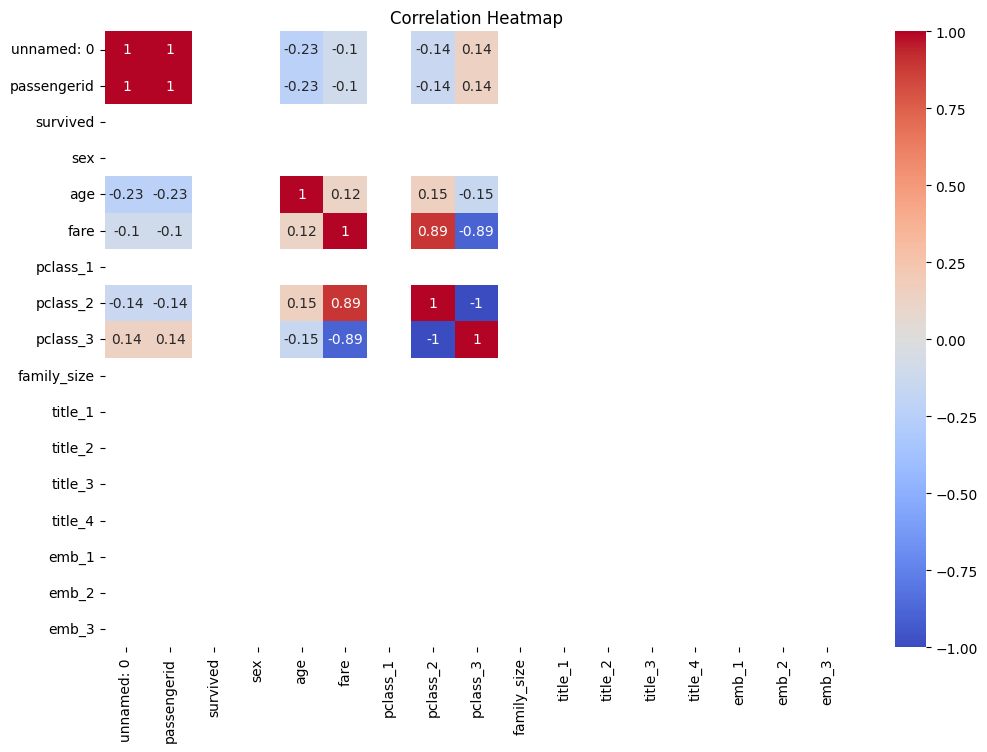

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
